# Heart Disease Prediction

##  Problem Definition
In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things). 

This is because we're going to be using a number of differnet **features** (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

### Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## EDA

C:\Users\abhay\Anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

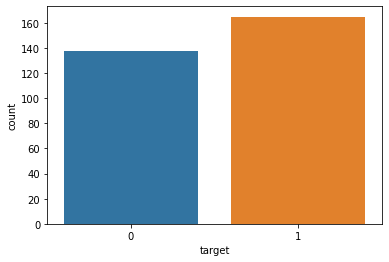

In [6]:
############ TARGET #############
sns.countplot("target",data=df)

<AxesSubplot:>

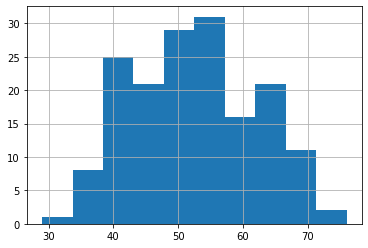

In [7]:
######### AGE VS TARGET  (When There is an Heart Disease Case) ##########
df[df['target']==1]['age'].hist(bins=10)

The Above Plot Shows That Age Ranges From **45 to 55** has a higher chance of suffering from heart disease.

C:\Users\abhay\Anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


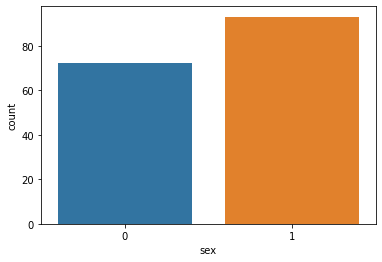

In [8]:
################## SEX VS TARGET (When There is an Heart Disease Case) ################
countsex = df[df['target']==1]
sns.countplot('sex',data=countsex);

The Above Bar Graph Shows That **Male** Has A Higher Change of Suffering From Heart Disease

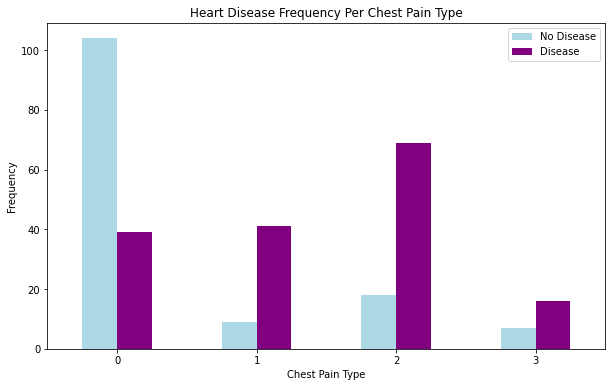

In [9]:
###################### CHEST PAIN VS TARGET ################
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "purple"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

In [10]:
print(f"Chance of Having a Chest Pain Type 2 is: {round(df[df.cp==2].count()[0]/len(df)*100)}%")

Chance of Having a Chest Pain Type 2 is: 29%


We Can Take From The Above Graph That Chest Pain Type 2(Non-anginal pain) is Causes The Higher Chances of Getting Suffered From an Heart Disease, But It is Not a Most Common Chest Pain To Happedn it is in the second place on the list. Most Common Chest Pain Type is 0(Typical angina)  Which Happens Due To Diserace Blood Supply In the Heart. 

**We Can Say THat If You are Having A Chest Pain Then There is 29% Chance that you might have a Heart Disease  fromt the above plot**

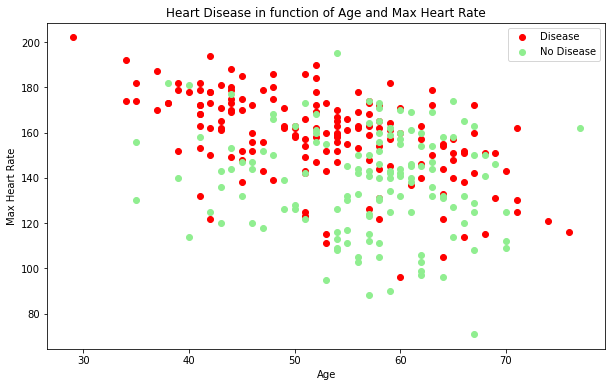

In [11]:
###################### HEART RATE (thalach) & AGE VS TARGET ################
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="red") # define it as a scatter figure

plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightgreen") # axis always come as (x, y)

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

By Seeing The Above Scatter Plot We Can See That **Heart Rate and Age Both Are Proposional To Heart Disease**. The Max Cases of Heart Disease Between The **40 - 60 Age and 140 to 180 Heart Rate**.

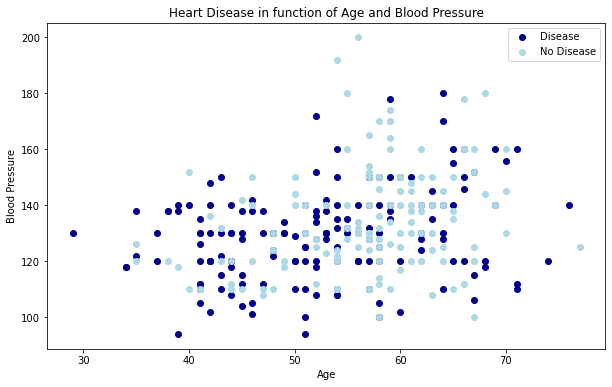

In [12]:
############### BLOOD PRESSURE & Age VS target ###############
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.trestbps[df.target==1], 
            c="darkblue") # define it as a scatter figure

plt.scatter(df.age[df.target==0], 
            df.trestbps[df.target==0], 
            c="lightblue") # axis always come as (x, y)

plt.title("Heart Disease in function of Age and Blood Pressure")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Blood Pressure");

By Seeing The Above Plot We Can See That **Blood Pressure is Inversely Proposnal to Heart Disease** Which is Kind of True Because as the blodd pressure decrease the inadequate flow of blood to the body's organs can cause strokes, heart attacks, and kidney failure.

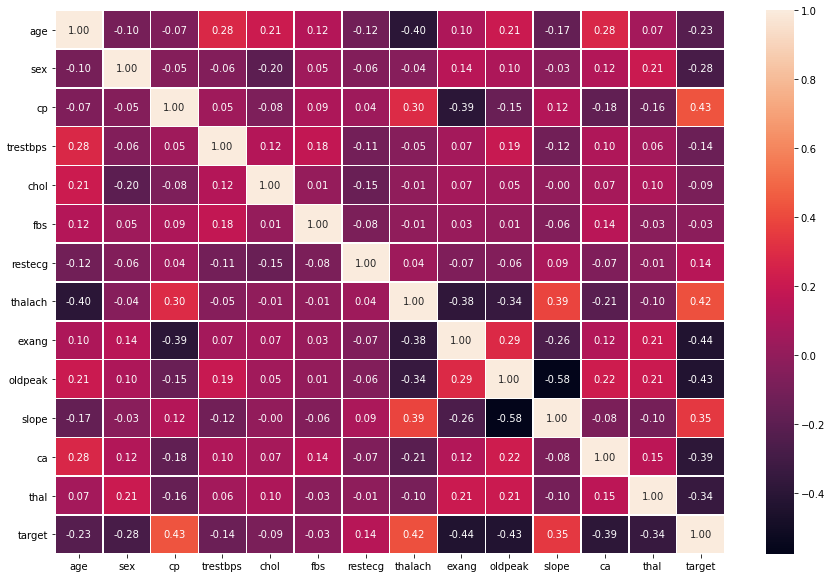

In [13]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f");

In [14]:
### Defining a Threshold value
threshold=0.60 ##Values that are related to each other more than 50%
### Returning all the values that are above threshold
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr
### Calling the function(DATAFRAME,THRESHOLD_VALUE)
correlation(df.iloc[:,:-1],threshold)

set()

We Can See That Are The Features are Different and Less Correlated. Which Is Good!

##### We Have Succesfully Analyze the data and Comes On Some Conclusions Now Let's Create a Model and Confirm Our Conlcusions

### MODELING

In [15]:
X = df.drop('target',axis=1)
y = df['target'].values

In [16]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [17]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [18]:
######### Splitting The Dataset ###############
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [19]:
X_train.shape,X_test.shape

((242, 13), (61, 13))

In [20]:
y_train.shape,y_test.shape

((242,), (61,))

#### Model Choices
We have got our data prepared now we can start building the model

1. Logistic Regression
2. Random Forest Classifier
3. Support Vector Machines
4. XGBoost Classifier

We Are Using All The Tree Based and Probability Based Algorithms So **We Don't require Feature Scalling.**

In [21]:
## Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

models = {"Logistic Regression ":LogisticRegression(),
         "Random Forest Classifier":RandomForestClassifier(),
         "Support Vector Machines":SVC()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    '''
    
    '''
    ### Random Seed For reproducible results
    np.random.seed(42)
    ### Make a dictionary to keep the model scores
    model_scores = {}
    ### Loop Threw all the models
    for name,model in models.items():
        ## Fit the model to the data
        model.fit(X_train,y_train)
        ## Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
        
    return model_scores


In [22]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\abhay\Anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression ': 0.8524590163934426,
 'Random Forest Classifier': 0.8524590163934426,
 'Support Vector Machines': 0.6885245901639344}

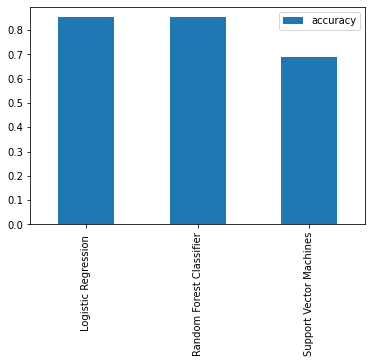

In [23]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

#### We Have Found That Logistic Regressiona and Random Forest Both Are Doing Good With An Accuracy of 85%

Now We Will Use Some Optimization methods to tune the models and find the best model.

### Tuning Techniques
**1. Grid Search CV : we try all possible combinations of the parameters of interest and find the best ones.**

**2. Randomized Search CV: We Randomly Select The Combinations of the parameters and finds the best ones.**

Grid Search is good when we work with a small number of hyperparameters. However, if the number of parameters to consider is particularly high and the magnitudes of influence are imbalanced, the better choice is to use the Random Search.

**We Will Use `Grid Search CV` As A Tuning Techinqu for Both Logistic Regression and Random Forest Classifier**

### Logistic Regression Tuning

In [24]:
from sklearn.model_selection import  GridSearchCV
###### LogisticRegression Parameter Grid
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}


gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

# Check the best parameters
print(gs_log_reg.best_params_)
# Evaluate the model
print(gs_log_reg.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 1.623776739188721, 'solver': 'liblinear'}
0.8524590163934426


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


In [25]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)

In [26]:
y_preds

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

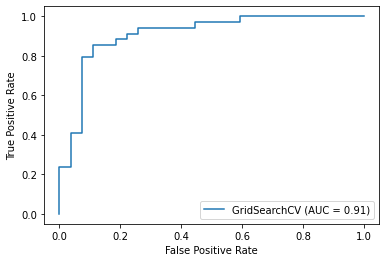

In [27]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

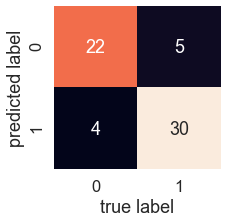

In [29]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size


def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [30]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [31]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score
# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [32]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [33]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [34]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8215873015873015

In [35]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9272727272727274

In [36]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8705403543192143

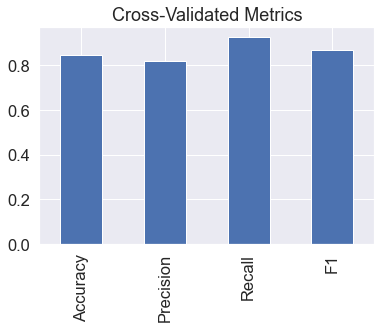

In [37]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

In [38]:
# Fit an instance of LogisticRegression 
clf.fit(X_train, y_train);

In [39]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.004500211522705059,
 'sex': -1.0091883365247618,
 'cp': 0.6494467117006438,
 'trestbps': -0.009317513198056111,
 'chol': -0.00283165151202051,
 'fbs': -0.1793872332737276,
 'restecg': 0.16071236212368858,
 'thalach': 0.02703053654127522,
 'exang': -0.6037404792579625,
 'oldpeak': -0.49598190424133215,
 'slope': 0.15910662247973625,
 'ca': -0.743311948471351,
 'thal': -0.5643893981000568}

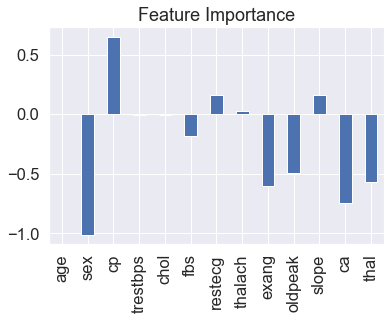

In [40]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [41]:
import pickle

# Save trained model to file
pickle.dump(gs_log_reg, open("heart.pkl", "wb"))

In [42]:
loaded_model = pickle.load(open("heart.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)


0.8524590163934426

#### What's Next

1. You Can Try To COllect More Data And Retrain The Model.
2. Try Some Other Models Like CAT Boost or XGBoost
